In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, ensemble, svm, tree, neural_network

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
result = {}

In [3]:
#hhids=[86, 59, 77, 26, 93, 101, 114, 171, 1086, 1403]
hhids=[26, 59, 77, 86, 93, 94, 101, 114, 171, 187]
for hhid in hhids: 
    result[hhid] = []
    print('Start :: Process on household {}...'.format(hhid))
    df = pd.read_csv('data_added2/added_hhdata_{}_2.csv'.format(hhid), index_col=0)
    df = df.dropna()
    st = []
    ct = 0
    for idx, row in df.iterrows():
        if row.GH < 2000 and row.GH > -1000:
            st.append(row)
        else:
            ct += 1

    df = pd.DataFrame(data=st, columns=df.columns)
    features = [ 'GH', 'use_hour','use_week', 'temperature', 'cloud_cover','wind_speed','is_weekday','month','hour']
    
    Y = list(df.use)[1:]
    try:
        Y.append(df.use.iloc[0])
    except:
        break
    Y = np.array(Y)

    X = df[features]
    X = np.array(X)
    X.shape

#     temp_df = pd.DataFrame(data=X, columns=features)
#     temp_df['y_use'] = Y
#     values = temp_df.values

#     # normalize features
#     scaler = MinMaxScaler()
#     y_gt = values[:,-1:]
#     scaled = scaler.fit_transform(values)
#     values = scaled

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=0.10,
                                                        random_state=666)


    classifiers = [
        linear_model.Ridge(alpha=1.0, random_state=0),
        linear_model.Lasso(alpha=0.55, random_state=0),
        linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06),
        linear_model.LassoLars(alpha=0.55),
        linear_model.LinearRegression(),
        ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        tree.DecisionTreeRegressor(),
        neural_network.MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    ]


    print('Start :: Find the best model for this household...')
    for clf in classifiers:
        clf.fit(X_train, Y_train)
#         print(clf)
        yhat = clf.predict(X_test)
        scores = cross_val_score(clf, X_train, Y_train)
        rmse = np.sqrt(mean_squared_error(Y_test, yhat))
        mae = mean_absolute_error(Y_test, yhat)
#         print('RMSE =>', rmse)
#         print('MAE =>', mae)
#         print('CV Score =>', scores)
        model_dict = {
            'name': clf.__class__.__name__,
            'rmse': rmse,
            'mae': mae,
        }
        result[hhid].append(model_dict)
#         print('')

Start :: Process on household 26...
Start :: Find the best model for this household...
Start :: Process on household 59...
Start :: Find the best model for this household...
Start :: Process on household 77...
Start :: Find the best model for this household...
Start :: Process on household 86...
Start :: Find the best model for this household...
Start :: Process on household 93...
Start :: Find the best model for this household...
Start :: Process on household 94...
Start :: Find the best model for this household...
Start :: Process on household 101...
Start :: Find the best model for this household...
Start :: Process on household 114...
Start :: Find the best model for this household...
Start :: Process on household 171...
Start :: Find the best model for this household...
Start :: Process on household 187...
Start :: Find the best model for this household...


In [4]:
result

{26: [{'mae': 0.6422484163913598, 'name': 'Ridge', 'rmse': 0.8994873595535375},
  {'mae': 0.7056880760613797, 'name': 'Lasso', 'rmse': 0.9583871898491639},
  {'mae': 0.6423384453466663,
   'name': 'BayesianRidge',
   'rmse': 0.8994362542052614},
  {'mae': 0.9259579510379181, 'name': 'LassoLars', 'rmse': 1.1896362851865183},
  {'mae': 0.64224640949524,
   'name': 'LinearRegression',
   'rmse': 0.899488958116431},
  {'mae': 0.5074877400876924,
   'name': 'RandomForestRegressor',
   'rmse': 0.775942069749005},
  {'mae': 0.6941102939198277,
   'name': 'DecisionTreeRegressor',
   'rmse': 1.1035350807492306},
  {'mae': 0.9353887217798719,
   'name': 'MLPRegressor',
   'rmse': 1.303045344862475}],
 59: [{'mae': 0.6320596478652565, 'name': 'Ridge', 'rmse': 0.8897901997340792},
  {'mae': 0.7900797847893261, 'name': 'Lasso', 'rmse': 1.0303530503700602},
  {'mae': 0.6323134829377859,
   'name': 'BayesianRidge',
   'rmse': 0.8897912255724025},
  {'mae': 0.9841835781665573, 'name': 'LassoLars', 'rm

In [5]:
final = []
for k, v in result.items():
    for i in result[k]:
        final.append([str(k), i['name'], i['rmse'], i['mae']])
col = ['household_id', 'alg', 'RMSE', 'MAE']
final = pd.DataFrame(data=final, columns=col)
final.to_csv('HL.csv')

In [6]:
final = pd.read_csv('HL.csv', index_col=0)
final

,household_id,alg,RMSE,MAE
0,26,Ridge,0.899487,0.642248
1,26,Lasso,0.958387,0.705688
2,26,BayesianRidge,0.899436,0.642338
3,26,LassoLars,1.189636,0.925958
4,26,LinearRegression,0.899489,0.642246
5,26,RandomForestRegressor,0.775942,0.507488
6,26,DecisionTreeRegressor,1.103535,0.694110
7,26,MLPRegressor,1.303045,0.935389
8,59,Ridge,0.889790,0.632060
9,59,Lasso,1.030353,0.790080


In [7]:
gb = final.groupby('alg')

In [8]:
N = 8
ind = range(N)
mean = list(gb['RMSE'].describe()['mean'])
std = list(gb['RMSE'].describe()['std'])

In [9]:
ind, mean, std

(range(0, 8),
 [0.7373160099161051,
  0.8694837881657362,
  0.8469025118198189,
  0.9953344508190863,
  0.7373124241355429,
  0.8119202532869197,
  0.594843247229143,
  0.7373136210743083],
 [0.2028779922462003,
  0.24124107316010898,
  0.2239118016522657,
  0.276813669714128,
  0.20286489947374003,
  0.2843397652856137,
  0.1627768080286613,
  0.20286340794816582])

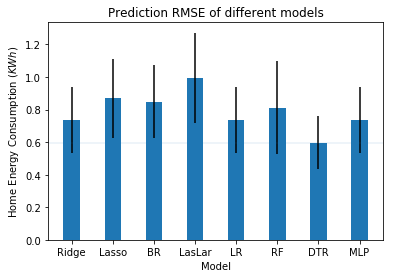

In [10]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# # ax2 = ax.twinx()
# ax.set_ylabel('RMSE1')
# # ax2.set_ylabel('RMSE2')


# # ax.bar(ind, ghi_mean, 0.3, yerr=ghi_std, color='red', align='center')
# # ax.autoscale(tight=True)
# plt.show()

plt.bar(ind, mean, 0.4, yerr=std, align='center')
plt.ylabel('Home Energy Consumption ($KWh$)')
plt.xlabel('Model')
plt.title('Prediction RMSE of different models')
plt.xticks(ind, ('Ridge', 'Lasso','BR' ,'LasLar', 'LR', 'RF', 'DTR', 'MLP'))
# plt.yticks(np.arange(0, 2))
plt.axhline(y=gb['RMSE'].describe()['mean']['RandomForestRegressor'], linewidth=0.15)
plt.savefig('hl.png')

In [11]:
fig = plt.figure()